In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_path = '/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/distance_permutation/processed_data/'
save_path = '/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/analysis/Yuqi_cellpairing/'

#read in csv
df = pd.read_csv(data_path+'CRUK_MvsT_distance_pvals.csv', index_col=0)
df

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,logfold_group,interaction,pairs
1,B cell,B cell,M,31.674848,20.281763,3.663307e-158,-0.643155,B cell --> B cell,B cell_B cell
2,B cell,B cell,T,31.751295,23.077955,3.868096e-102,-0.460300,B cell --> B cell,B cell_B cell
3,B cell,CD4+ T cell,M,35.155589,21.566546,3.332354e-242,-0.704959,B cell --> CD4+ T cell,B cell_CD4+ T cell
4,B cell,CD4+ T cell,T,30.680272,25.586851,6.361578e-53,-0.261909,B cell --> CD4+ T cell,B cell_CD4+ T cell
5,B cell,CD4+ Treg,M,34.455233,22.242838,7.571214e-96,-0.631382,B cell --> CD4+ Treg,B cell_CD4+ Treg
...,...,...,...,...,...,...,...,...,...
1009,Stroma,Smooth Muscle,T,31.885647,35.832945,1.632304e-07,0.168379,Stroma --> Smooth Muscle,Stroma_Smooth Muscle
1010,Stroma,Squamous,M,35.978070,37.528150,3.409790e-01,0.060855,Stroma --> Squamous,Stroma_Squamous
1011,Stroma,Squamous,T,31.414899,36.365405,2.508302e-08,0.211118,Stroma --> Squamous,Stroma_Squamous
1012,Stroma,Stroma,M,35.438556,36.048694,3.776538e-17,0.024627,Stroma --> Stroma,Stroma_Stroma


In [7]:
#Get rid of Nan and B cell because not frequent
dfn = df.loc[~(df['celltype1'].isnull().values)]
dfnn = dfn.loc[~(dfn['celltype2'].isnull().values)]
#dfnb = dfnn.loc[~((dfnn['celltype1']=='B cell')|(dfnn['celltype2']=='B cell'))]
dfnnn = dfnn.loc[~(dfnn['interaction'].isnull().values)]
dfnnn

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,logfold_group,interaction,pairs
1,B cell,B cell,M,31.674848,20.281763,3.663307e-158,-0.643155,B cell --> B cell,B cell_B cell
2,B cell,B cell,T,31.751295,23.077955,3.868096e-102,-0.460300,B cell --> B cell,B cell_B cell
3,B cell,CD4+ T cell,M,35.155589,21.566546,3.332354e-242,-0.704959,B cell --> CD4+ T cell,B cell_CD4+ T cell
4,B cell,CD4+ T cell,T,30.680272,25.586851,6.361578e-53,-0.261909,B cell --> CD4+ T cell,B cell_CD4+ T cell
5,B cell,CD4+ Treg,M,34.455233,22.242838,7.571214e-96,-0.631382,B cell --> CD4+ Treg,B cell_CD4+ Treg
...,...,...,...,...,...,...,...,...,...
1009,Stroma,Smooth Muscle,T,31.885647,35.832945,1.632304e-07,0.168379,Stroma --> Smooth Muscle,Stroma_Smooth Muscle
1010,Stroma,Squamous,M,35.978070,37.528150,3.409790e-01,0.060855,Stroma --> Squamous,Stroma_Squamous
1011,Stroma,Squamous,T,31.414899,36.365405,2.508302e-08,0.211118,Stroma --> Squamous,Stroma_Squamous
1012,Stroma,Stroma,M,35.438556,36.048694,3.776538e-17,0.024627,Stroma --> Stroma,Stroma_Stroma


In [8]:
dfnnn.columns

Index(['celltype1', 'celltype2', 'consensus.diagnosis', 'expected_mean',
       'observed_mean', 'pvalue', 'logfold_group', 'interaction', 'pairs'],
      dtype='object')

In [9]:
#Align the 2 dataframes for calculating statistics
df_M = dfnnn.loc[dfnnn['consensus.diagnosis']=='M']
df_T = dfnnn.loc[dfnnn['consensus.diagnosis']=='T']
df_T.rename(columns={'consensus.diagnosis':'consensus.diagnosis_T', 'expected_mean':'expected_mean_T', 'observed_mean':'observed_mean_T',
       'pvalue':'pvalue_T', 'logfold_group':'logfold_group_T',}, inplace=True)
df_M.rename(columns={'logfold_group':'log fold distance M',}, inplace=True)
df_merged = pd.merge(df_M, df_T, on=['celltype1', 'celltype2', 'interaction'], how='inner')

#Calculate the statistics to plot and select interersting pairs
df_merged['max_p'] = df_merged[['pvalue','pvalue_T']].min(axis=1)
df_m = df_merged.loc[df_merged['max_p']<0.05]
df_m['delta log fold distance (M-T)'] = df_m['log fold distance M'] - df_m['logfold_group_T']
df_m['log_p'] = -np.log(df_m['max_p'])
df_m

/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-9-7c4702df980c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['delta log fold distance (M-T)'] = df_m['log fold distance M'] - df_m['logfold_group_T']
/Users/jwhickey/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-9-7c4702df980

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p
0,B cell,B cell,M,31.674848,20.281763,3.663307e-158,-0.643155,B cell --> B cell,B cell_B cell,T,31.751295,23.077955,3.868096e-102,-0.460300,B cell_B cell,3.663307e-158,-0.182855,362.510078
1,B cell,CD4+ T cell,M,35.155589,21.566546,3.332354e-242,-0.704959,B cell --> CD4+ T cell,B cell_CD4+ T cell,T,30.680272,25.586851,6.361578e-53,-0.261909,B cell_CD4+ T cell,3.332354e-242,-0.443050,556.021914
2,B cell,CD4+ Treg,M,34.455233,22.242838,7.571214e-96,-0.631382,B cell --> CD4+ Treg,B cell_CD4+ Treg,T,30.649787,27.008157,1.476202e-29,-0.182482,B cell_CD4+ Treg,7.571214e-96,-0.448900,219.023815
3,B cell,CD8+ T cell,M,35.487159,24.198232,4.061748e-127,-0.552395,B cell --> CD8+ T cell,B cell_CD8+ T cell,T,30.656624,26.536210,5.809366e-41,-0.208237,B cell_CD8+ T cell,4.061748e-127,-0.344159,291.026693
4,B cell,Chief,M,35.016146,27.649816,1.927011e-02,-0.340750,B cell --> Chief,B cell_Chief,T,30.874177,21.587224,1.405981e-02,-0.516223,B cell_Chief,1.405981e-02,0.175473,4.264435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Stroma,Parietal,M,34.425294,29.377149,1.037979e-45,-0.228775,Stroma --> Parietal,Stroma_Parietal,T,32.611164,30.755116,2.010227e-04,-0.084539,Stroma_Parietal,1.037979e-45,-0.144235,103.579054
472,Stroma,Plasma,M,35.730666,33.380885,7.797113e-41,-0.098141,Stroma --> Plasma,Stroma_Plasma,T,31.877703,30.694226,2.071243e-22,-0.054580,Stroma_Plasma,7.797113e-41,-0.043560,92.352235
473,Stroma,Smooth Muscle,M,35.555376,40.118919,4.633342e-02,0.174215,Stroma --> Smooth Muscle,Stroma_Smooth Muscle,T,31.885647,35.832945,1.632304e-07,0.168379,Stroma_Smooth Muscle,1.632304e-07,0.005836,15.628103
474,Stroma,Squamous,M,35.978070,37.528150,3.409790e-01,0.060855,Stroma --> Squamous,Stroma_Squamous,T,31.414899,36.365405,2.508302e-08,0.211118,Stroma_Squamous,2.508302e-08,-0.150262,17.501075


In [10]:
#Thresholds for plotting
df_m['enriched pair']=np.where((df_m['delta log fold distance (M-T)']<-0.5)&(df_m['log fold distance M']<-0.15),'Metaplasia','not enriched')

<ipython-input-10-6cf3b51c910d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['enriched pair']=np.where((df_m['delta log fold distance (M-T)']<-0.5)&(df_m['log fold distance M']<-0.15),'Metaplasia','not enriched')


In [11]:
#GENERAL GRAPH SETTINGs
#font size of graph
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#Settings for graph
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [12]:
tt = df_m.sort_values(by=['delta log fold distance (M-T)'])
tt

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
293,Neck,Goblet,M,35.338668,28.094833,1.865943e-82,-0.330943,Neck --> Goblet,Neck_Goblet,T,30.410880,55.002725,5.782262e-02,0.854916,Neck_Goblet,1.865943e-82,-1.185858,188.188211,Metaplasia
209,Goblet,Neck,M,34.924070,28.717973,7.819747e-69,-0.282268,Goblet --> Neck,Goblet_Neck,T,30.553319,47.666696,2.751686e-01,0.641652,Goblet_Neck,7.819747e-69,-0.923920,156.821719,Metaplasia
191,Foveloar,Parietal,M,34.542386,31.162933,1.101993e-35,-0.148537,Foveloar --> Parietal,Foveloar_Parietal,T,32.081032,49.421779,2.167945e-04,0.623426,Foveloar_Parietal,1.101993e-35,-0.771963,80.493358,not enriched
432,Squamous,B cell,M,35.563857,24.785033,1.037209e-08,-0.520943,Squamous --> B cell,Squamous_B cell,T,31.799751,36.814794,8.507479e-07,0.211270,Squamous_B cell,1.037209e-08,-0.732213,18.384147,Metaplasia
442,Squamous,Lymphatic,M,36.936248,31.631367,8.848256e-04,-0.223681,Squamous --> Lymphatic,Squamous_Lymphatic,T,31.824247,44.952361,2.026104e-60,0.498271,Squamous_Lymphatic,2.026104e-60,-0.721952,137.448991,Metaplasia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Goblet,Nerve,M,35.560126,32.191340,1.920966e-04,-0.143588,Goblet --> Nerve,Goblet_Nerve,T,29.203118,17.612644,1.697594e-01,-0.729511,Goblet_Nerve,1.920966e-04,0.585923,8.557512,not enriched
122,DC,Nerve,M,31.429967,33.971834,9.260947e-01,0.112198,DC --> Nerve,DC_Nerve,T,32.382293,22.418950,3.969661e-02,-0.530486,DC_Nerve,3.969661e-02,0.642685,3.226489,not enriched
308,Nerve,DC,M,31.449440,34.475796,9.680225e-01,0.132550,Nerve --> DC,Nerve_DC,T,32.417043,22.418950,3.969661e-02,-0.532034,Nerve_DC,3.969661e-02,0.664583,3.226489,not enriched
360,Neutrophil,Neuroendocrine,M,36.136402,46.258000,1.741838e-01,0.356250,Neutrophil --> Neuroendocrine,Neutrophil_Neuroendocrine,T,31.701751,23.887638,6.061890e-14,-0.408298,Neutrophil_Neuroendocrine,6.061890e-14,0.764548,30.434170,not enriched


In [ ]:
##check percentages of these cells tomorrow
##send Yuqi pairs that are interesting to plot
##check certain cell types like CD4+ Treg, Endothelial CD36hi, Lymphatic, B cell, Neuroendocrine cell

In [17]:
both_enrich = tt.loc[(tt['log fold distance M']<-0.4)&(tt['logfold_group_T']<-0.4)]
both_enrich

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
9,B cell,Goblet,M,33.246037,20.345929,4.015091e-05,-0.708442,B cell --> Goblet,B cell_Goblet,T,29.750608,21.105134,9.885075e-05,-0.495325,B cell_Goblet,4.015091e-05,-0.213117,10.122865,not enriched
200,Goblet,Chief,M,36.197478,22.854515,6.189066e-07,-0.663410,Goblet --> Chief,Goblet_Chief,T,27.899685,20.099751,2.858640e-01,-0.473071,Goblet_Chief,6.189066e-07,-0.190339,14.295311,not enriched
0,B cell,B cell,M,31.674848,20.281763,3.663307e-158,-0.643155,B cell --> B cell,B cell_B cell,T,31.751295,23.077955,3.868096e-102,-0.460300,B cell_B cell,3.663307e-158,-0.182855,362.510078,not enriched
196,Goblet,B cell,M,33.407769,24.654170,8.292521e-02,-0.438352,Goblet --> B cell,Goblet_B cell,T,29.694866,22.307634,2.115205e-03,-0.412676,Goblet_B cell,2.115205e-03,-0.025676,6.158604,not enriched
97,Chief,Goblet,M,35.983861,26.221750,1.713642e-05,-0.456586,Chief --> Goblet,Chief_Goblet,T,27.800682,20.099751,2.780392e-01,-0.467943,Chief_Goblet,1.713642e-05,0.011357,10.974305,not enriched
15,B cell,Neuroendocrine,M,34.886717,24.123997,1.423203e-32,-0.532209,B cell --> Neuroendocrine,B cell_Neuroendocrine,T,31.915971,18.383427,2.893752e-08,-0.795873,B cell_Neuroendocrine,1.423203e-32,0.263664,73.329813,not enriched


In [13]:
lbl_total2 = tt.loc[(tt['delta log fold distance (M-T)']>0.5)&(tt['logfold_group_T']<-0.15)]

lbl_total2

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
313,Nerve,Lymphatic,M,34.919752,43.897523,7.928469e-17,0.330096,Nerve --> Lymphatic,Nerve_Lymphatic,T,30.725701,27.084525,1.196666e-02,-0.181977,Nerve_Lymphatic,7.928469e-17,0.512073,37.073487,not enriched
312,Nerve,Goblet,M,35.339073,31.681117,2.727826e-03,-0.157641,Nerve --> Goblet,Nerve_Goblet,T,29.213389,17.612644,7.844538e-02,-0.730018,Nerve_Goblet,2.727826e-03,0.572377,5.904250,not enriched
232,Lymphatic,Nerve,M,34.773769,43.410953,3.658664e-15,0.320060,Lymphatic --> Nerve,Lymphatic_Nerve,T,30.924068,25.781307,1.328862e-03,-0.262405,Lymphatic_Nerve,3.658664e-15,0.582464,33.241678,not enriched
210,Goblet,Nerve,M,35.560126,32.191340,1.920966e-04,-0.143588,Goblet --> Nerve,Goblet_Nerve,T,29.203118,17.612644,1.697594e-01,-0.729511,Goblet_Nerve,1.920966e-04,0.585923,8.557512,not enriched
122,DC,Nerve,M,31.429967,33.971834,9.260947e-01,0.112198,DC --> Nerve,DC_Nerve,T,32.382293,22.418950,3.969661e-02,-0.530486,DC_Nerve,3.969661e-02,0.642685,3.226489,not enriched
308,Nerve,DC,M,31.449440,34.475796,9.680225e-01,0.132550,Nerve --> DC,Nerve_DC,T,32.417043,22.418950,3.969661e-02,-0.532034,Nerve_DC,3.969661e-02,0.664583,3.226489,not enriched
360,Neutrophil,Neuroendocrine,M,36.136402,46.258000,1.741838e-01,0.356250,Neutrophil --> Neuroendocrine,Neutrophil_Neuroendocrine,T,31.701751,23.887638,6.061890e-14,-0.408298,Neutrophil_Neuroendocrine,6.061890e-14,0.764548,30.434170,not enriched
339,Neuroendocrine,Neutrophil,M,36.148100,50.790592,1.839561e-03,0.490641,Neuroendocrine --> Neutrophil,Neuroendocrine_Neutrophil,T,31.468222,23.314546,4.500027e-08,-0.432665,Neuroendocrine_Neutrophil,4.500027e-08,0.923307,16.916597,not enriched


In [15]:
lbl_total = tt.loc[(tt['delta log fold distance (M-T)']<-0.5)&(tt['log fold distance M']<-0.15)]

lbl_total

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,pairs_y,max_p,delta log fold distance (M-T),log_p,enriched pair
293,Neck,Goblet,M,35.338668,28.094833,1.865943e-82,-0.330943,Neck --> Goblet,Neck_Goblet,T,30.410880,55.002725,5.782262e-02,0.854916,Neck_Goblet,1.865943e-82,-1.185858,188.188211,Metaplasia
209,Goblet,Neck,M,34.924070,28.717973,7.819747e-69,-0.282268,Goblet --> Neck,Goblet_Neck,T,30.553319,47.666696,2.751686e-01,0.641652,Goblet_Neck,7.819747e-69,-0.923920,156.821719,Metaplasia
432,Squamous,B cell,M,35.563857,24.785033,1.037209e-08,-0.520943,Squamous --> B cell,Squamous_B cell,T,31.799751,36.814794,8.507479e-07,0.211270,Squamous_B cell,1.037209e-08,-0.732213,18.384147,Metaplasia
442,Squamous,Lymphatic,M,36.936248,31.631367,8.848256e-04,-0.223681,Squamous --> Lymphatic,Squamous_Lymphatic,T,31.824247,44.952361,2.026104e-60,0.498271,Squamous_Lymphatic,2.026104e-60,-0.721952,137.448991,Metaplasia
441,Squamous,Goblet,M,36.938037,30.000837,1.213114e-15,-0.300104,Squamous --> Goblet,Squamous_Goblet,T,30.822952,40.839874,1.305021e-04,0.405973,Squamous_Goblet,1.213114e-15,-0.706078,34.345585,Metaplasia
20,B cell,Squamous,M,35.078234,25.581072,2.728450e-07,-0.455499,B cell --> Squamous,B cell_Squamous,T,31.441288,35.856660,3.562901e-05,0.189581,B cell_Squamous,2.728450e-07,-0.645080,15.114362,Metaplasia
216,Goblet,Squamous,M,36.368430,31.052206,1.368364e-06,-0.227991,Goblet --> Squamous,Goblet_Squamous,T,30.732626,40.611077,1.132303e-01,0.402102,Goblet_Squamous,1.368364e-06,-0.630093,13.501894,Metaplasia
179,Foveloar,DC,M,34.325204,28.670529,3.235328e-27,-0.259700,Foveloar --> DC,Foveloar_DC,T,31.043665,38.408038,2.556345e-01,0.307109,Foveloar_DC,3.235328e-27,-0.566809,60.995667,Metaplasia
205,Goblet,Goblet,M,34.711429,30.148631,2.555550e-55,-0.203318,Goblet --> Goblet,Goblet_Goblet,T,28.846029,36.657307,1.076729e-17,0.345728,Goblet_Goblet,2.555550e-55,-0.549046,125.703913,Metaplasia
386,Parietal,Squamous,M,34.471408,28.214046,1.935365e-02,-0.288987,Parietal --> Squamous,Parietal_Squamous,T,34.486485,40.204936,4.222498e-01,0.221342,Parietal_Squamous,1.935365e-02,-0.510328,3.944874,Metaplasia


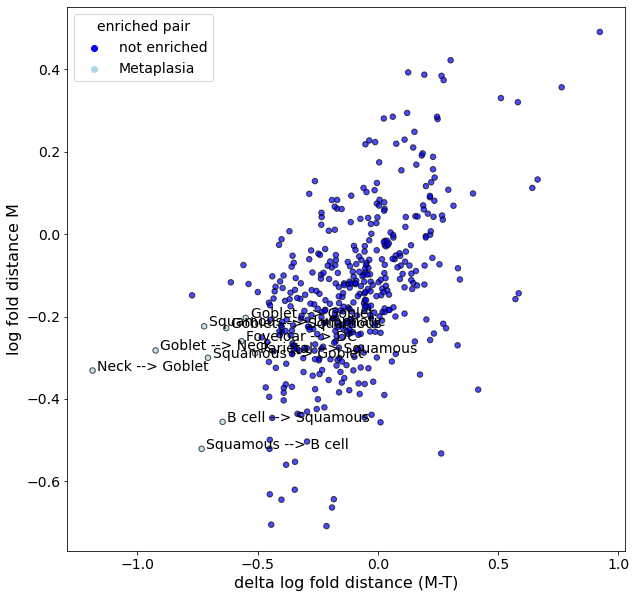

In [16]:
lbl_total = tt.loc[(tt['delta log fold distance (M-T)']<-0.5)&(tt['log fold distance M']<-0.15)]

plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_m, x="delta log fold distance (M-T)", y="log fold distance M", hue='enriched pair', palette=['blue', 'lightblue'],\
                    linewidth=1, edgecolor='black',alpha=0.7,s=30)

for i, txt in enumerate(lbl_total['interaction']):
    ax.annotate(txt, (lbl_total['delta log fold distance (M-T)'].iat[i]+0.02,lbl_total['log fold distance M'].iat[i]))
    
#plt.savefig(save_path+'distance_calculation.png', format='png', dpi=300, transparent=True, bbox_inches='tight')   

In [11]:
save_path

'/Users/jwhickey/Nolan Lab Dropbox/John Hickey/CRUK/Cell_Atlas/analysis/Yuqi_cellpairing/'

In [22]:
df8 = tt.loc[tt['celltype1']=='Neuroendocrine']
df8

,celltype1,celltype2,consensus.diagnosis,expected_mean,observed_mean,pvalue,log fold distance M,interaction,pairs_x,consensus.diagnosis_D,expected_mean_D,observed_mean_D,pvalue_D,logfold_group_D,pairs_y,max_p,delta log fold distance (M-D),log_p,enriched pair
361,Neuroendocrine,Smooth Muscle,M,36.333575,33.344832,8.038720e-22,-0.123840,Neuroendocrine --> Smooth Muscle,Neuroendocrine_Smooth Muscle,D,35.835472,47.478723,4.970375e-05,0.405893,Neuroendocrine_Smooth Muscle,8.038720e-22,-0.529733,48.572602,Metaplasia
363,Neuroendocrine,Stroma,M,35.503225,32.883903,3.124767e-34,-0.110569,Neuroendocrine --> Stroma,Neuroendocrine_Stroma,D,35.989029,42.230533,3.270640e-01,0.230729,Neuroendocrine_Stroma,3.124767e-34,-0.341298,77.148534,Metaplasia
344,Neuroendocrine,CD8+ T cell,M,36.066055,31.561832,1.714510e-33,-0.192461,Neuroendocrine --> CD8+ T cell,Neuroendocrine_CD8+ T cell,D,35.893559,38.339532,1.790220e-01,0.095108,Neuroendocrine_CD8+ T cell,1.714510e-33,-0.287568,75.446180,Metaplasia
347,Neuroendocrine,Endothelial,M,36.361720,31.199772,7.662538e-41,-0.220885,Neuroendocrine --> Endothelial,Neuroendocrine_Endothelial,D,35.557841,37.212895,2.796528e-02,0.065635,Neuroendocrine_Endothelial,7.662538e-41,-0.286520,92.369646,Metaplasia
342,Neuroendocrine,CD4+ T cell,M,36.118609,31.289198,6.859857e-23,-0.207078,Neuroendocrine --> CD4+ T cell,Neuroendocrine_CD4+ T cell,D,36.331797,38.204627,1.929049e-02,0.072515,Neuroendocrine_CD4+ T cell,6.859857e-23,-0.279592,51.033771,Metaplasia
356,Neuroendocrine,Neuroendocrine,M,35.389107,27.121349,6.697877e-104,-0.383876,Neuroendocrine --> Neuroendocrine,Neuroendocrine_Neuroendocrine,D,36.356396,32.929777,7.336464e-07,-0.142816,Neuroendocrine_Neuroendocrine,6.697877e-104,-0.241060,237.567059,Metaplasia
360,Neuroendocrine,Plasma,M,36.367605,31.278720,3.956943e-22,-0.217472,Neuroendocrine --> Plasma,Neuroendocrine_Plasma,D,35.718819,36.174659,8.531002e-03,0.018295,Neuroendocrine_Plasma,3.956943e-22,-0.235767,49.281400,Metaplasia
352,Neuroendocrine,M1 Macrophage,M,35.882996,31.149635,5.799470e-31,-0.204085,Neuroendocrine --> M1 Macrophage,Neuroendocrine_M1 Macrophage,D,34.754419,34.587272,3.932709e-03,-0.006955,Neuroendocrine_M1 Macrophage,5.799470e-31,-0.197130,69.622371,Metaplasia
354,Neuroendocrine,Neck,M,35.880572,30.029357,2.648352e-68,-0.256829,Neuroendocrine --> Neck,Neuroendocrine_Neck,D,35.541166,31.237011,2.600375e-04,-0.186235,Neuroendocrine_Neck,2.648352e-68,-0.070595,155.601849,Metaplasia
350,Neuroendocrine,Goblet,M,35.132767,29.833225,9.429214e-40,-0.235897,Neuroendocrine --> Goblet,Neuroendocrine_Goblet,D,35.047588,31.052442,1.187558e-03,-0.174608,Neuroendocrine_Goblet,9.429214e-40,-0.061289,89.859591,Metaplasia


In [115]:
df8 = tt.loc[tt['celltype2']=='CD4+ Treg']
df8

,celltype1,celltype2,treatment,expected_mean,observed_mean,pvalue,logfold_group,interaction,treatment_T,expected_mean_T,observed_mean_T,pvalue_T,logfold_group_T,max_p,log2_change,log_p
79,Macrophage CD169+,CD4+ Treg,2HC T cells,44.740631,46.662966,4.610666e-01,0.060692,Macrophage CD169+ --> CD4+ Treg,T cells,39.150952,69.813125,0.002502,0.834451,2.501650e-03,-0.773758,5.990805
118,Stromal,CD4+ Treg,2HC T cells,44.315879,38.856848,6.759625e-06,-0.189655,Stromal --> CD4+ Treg,T cells,41.792153,54.949346,0.019470,0.394870,6.759625e-06,-0.584525,11.904543
157,Tumor PDL1+ MHCI+,CD4+ Treg,2HC T cells,40.642146,32.342768,1.127503e-06,-0.329533,Tumor PDL1+ MHCI+ --> CD4+ Treg,T cells,42.689320,42.967707,0.614901,0.009378,1.127503e-06,-0.338911,13.695505
53,DC,CD4+ Treg,2HC T cells,45.618480,37.393310,4.461615e-04,-0.286838,DC --> CD4+ Treg,T cells,41.522155,40.249230,0.636713,-0.044920,4.461615e-04,-0.241918,7.714830
105,NK,CD4+ Treg,2HC T cells,43.617850,33.678442,8.941423e-03,-0.373093,NK --> CD4+ Treg,T cells,39.057113,33.116928,0.781166,-0.238016,8.941423e-03,-0.135077,4.717061
27,CD8+ T cell,CD4+ Treg,2HC T cells,41.492610,30.087260,6.405713e-04,-0.463702,CD8+ T cell --> CD4+ Treg,T cells,39.951050,31.548201,0.172757,-0.340676,6.405713e-04,-0.123026,7.353150
131,Tumor,CD4+ Treg,2HC T cells,44.062724,37.409967,3.650267e-07,-0.236136,Tumor --> CD4+ Treg,T cells,43.324750,38.396862,0.000130,-0.174203,3.650267e-07,-0.061933,14.823295
66,Macrophage,CD4+ Treg,2HC T cells,45.273814,37.531542,5.398412e-04,-0.270573,Macrophage --> CD4+ Treg,T cells,41.905204,34.123146,0.029843,-0.296379,5.398412e-04,0.025805,7.524236
14,CD4+ Treg,CD4+ Treg,2HC T cells,41.783734,26.138242,2.396826e-02,-0.676779,CD4+ Treg --> CD4+ Treg,T cells,58.232735,32.781237,0.056799,-0.828960,2.396826e-02,0.152181,3.731025
1,CD4+ T cell,CD4+ Treg,2HC T cells,45.716635,31.556330,3.905736e-06,-0.534790,CD4+ T cell --> CD4+ Treg,T cells,37.743711,21.300424,0.109300,-0.825354,3.905736e-06,0.290564,12.453064
